In [1]:
# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# reading the csv file
df=pd.read_csv('baseball.csv')


In [3]:
# knowing the data
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
# adding new columns Run difference as it is important
df['RD']=df['RS']-df['RA']

In [5]:
# check relationship with playoffs
abs(df.corr()['Playoffs']).sort_values(ascending=False)

Playoffs        1.000000
W               0.616757
RD              0.581094
OOBP            0.433572
RS              0.386628
OSLG            0.366744
OBP             0.363890
SLG             0.324713
BA              0.290217
RA              0.261477
Year            0.145779
G               0.022208
RankSeason           NaN
RankPlayoffs         NaN
Name: Playoffs, dtype: float64

In [6]:

# so we will check relation of W 
abs(df.corr()['W']).sort_values(ascending=False)
# it is clear RD has linear relationship with W

W               1.000000
RD              0.937851
RankSeason      0.755098
OOBP            0.634315
Playoffs        0.616757
OSLG            0.568490
RA              0.532394
RS              0.511745
OBP             0.481836
BA              0.408716
SLG             0.401496
RankPlayoffs    0.198960
G               0.105309
Year            0.004138
Name: W, dtype: float64

In [7]:
# checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
RD              1232 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 154.1+ KB


In [8]:
# missing values handling



X_np=df.iloc[:,:].values# converted to numpy
X_np


# getting columns for missing values
cols=['OOBP','OSLG','RankSeason','RankPlayoffs']
nan=[]
for i in cols:
#     print(i)
     a=df.columns.get_loc(f"{i}")
     nan.append(a)
# getting columns for string vALUES
nan

[13, 14, 10, 11]

In [9]:
# solving missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)#nan use for recognise missing values,strage default is mean and median,most frequent can also be used
#axis =0 for impute along cols and axis =1 for along the rows
X_np[:,nan]=imputer.fit_transform(X_np[:, nan])#transform for replace missing values with stragey

/home/gag007/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
dfs=pd.DataFrame(X_np,columns=df.columns)# with missing values
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 16 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null object
RS              1232 non-null object
RA              1232 non-null object
W               1232 non-null object
OBP             1232 non-null object
SLG             1232 non-null object
BA              1232 non-null object
Playoffs        1232 non-null object
RankSeason      1232 non-null object
RankPlayoffs    1232 non-null object
G               1232 non-null object
OOBP            1232 non-null object
OSLG            1232 non-null object
RD              1232 non-null object
dtypes: object(16)
memory usage: 154.1+ KB


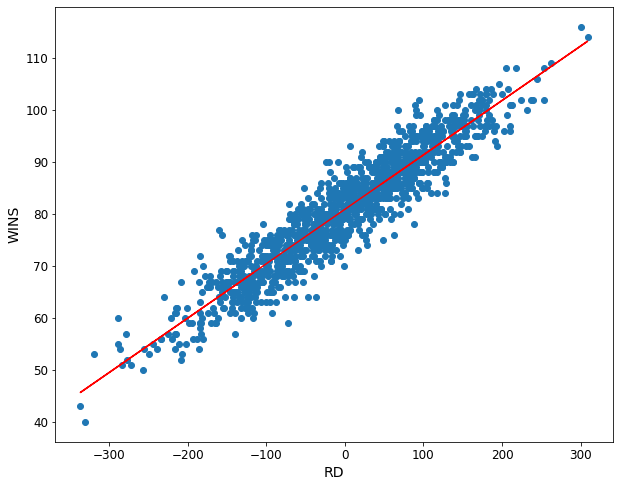

In [11]:
# verify by plotting graph the linear relationship between wins and RD
x=df.RD
y=df.W
# Find the slope and intercept of the best fit line
slope, intercept = np.polyfit(x, y, 1)

# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.ylabel("WINS")
plt.xlabel("RD")
plt.plot(x,abline_values, 'r')


In [12]:
attack=df[['RS','OBP','SLG','BA']]# check corelation between batting attributes
defense=df[['RA','OOBP','OSLG']]# check corelation between bowling attributes
df1=attack.corr()
df2=defense.corr()
df3=pd.concat([df1,df2],axis=1)# combine attack and defene relation

/home/gag007/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [13]:
# finding best attributes
df3# it is clear batting average is not that much essential for RS

,RS,OBP,SLG,BA,RA,OOBP,OSLG
BA,0.827000,0.851958,0.790481,1.000000,NaN,NaN,NaN
OBP,0.900492,1.000000,0.790910,0.851958,NaN,NaN,NaN
OOBP,NaN,NaN,NaN,NaN,0.910344,1.000000,0.830902
OSLG,NaN,NaN,NaN,NaN,0.909319,0.830902,1.000000
RA,NaN,NaN,NaN,NaN,1.000000,0.910344,0.909319
RS,1.000000,0.900492,0.918740,0.827000,NaN,NaN,NaN
SLG,0.918740,0.790910,1.000000,0.790481,NaN,NaN,NaN


In [14]:
# compare RS features using sklearn

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=df[['SLG','OBP','BA']]
Y=df['RS']
best=SelectKBest(score_func=chi2,k=3)
best.fit(x,y)
scores=pd.DataFrame(best.scores_)
props=pd.DataFrame(x.columns)
# concat two dataframes
result=pd.concat([scores,props],axis=1)
result.columns=['scores','names']
result

,scores,names
0,0.675230,SLG
1,0.228211,OBP
2,0.162874,BA


In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
# building lin reg model for RS AND SLG,OBP
X=df[['SLG','OBP']]
Y=df['RS']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,shuffle=True)

from sklearn.linear_model import LinearRegression
run_score=LinearRegression()
run_score.fit(xtrain,ytrain)# fit model
print(xtest.shape)
ypred=run_score.predict(xtest)# predict result
print(run_score.intercept_)
print(run_score.coef_)
# accuracy_score(ytest,ypred)
rmse=np.sqrt(mean_squared_error(ypred,ytest))
print("root mean square error :",rmse)





(247, 2)
-813.7968364332138
[1492.23984361 2868.94100656]
root mean square error : 26.17075588622023


In [17]:
dfs.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG', 'RD'],
      dtype='object')

In [18]:
# builing linreg for RA and OOBP,OSLG
X=dfs[['OSLG','OOBP']]# using df1 as it has all misssing values
Y=dfs['RA']

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,shuffle=True)

from sklearn.linear_model import LinearRegression
run_allow=LinearRegression()
run_allow.fit(xtrain,ytrain)
print(xtest.shape)
ypred=run_allow.predict(xtest)
print(run_allow.intercept_)
print(run_allow.coef_)
rmse=np.sqrt(mean_squared_error(ypred,ytest))
print("root mean square error :",rmse)




(247, 2)
-919.9519076222665
[1678.34021601 2801.54318696]
root mean square error : 76.25170579502024


In [19]:
# linear model between runs difference and wins

x = df[['RD']]

#x=df.RD
# x=np.array(x)
# x=x.reshape(-1,1)
y = df[['W']]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,shuffle=True)

Wins = LinearRegression()
Wins.fit(xtrain,ytrain)
ypred=Wins.predict(xtest)
 
print(Wins.intercept_)
print(Wins.coef_)
rmse=np.sqrt(mean_squared_error(ypred,ytest))
print("root mean square error :",rmse)


[80.93093852]
[[0.10471694]]
root mean square error : 3.8384547893865166


In [20]:
from sklearn.model_selection import train_test_split

X=df[['W']];Y=df[['Playoffs']]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,shuffle=True)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
qualify=regressor.predict(xtest)


In [21]:
# random values of OOBP OSLG,SLG,OBP from dataset

import random
OBP=df['OBP']
n=random.randint(0,len(df))
print(n)
OBP=OBP[n]
SLG=df['SLG']
SLG=SLG[n]
OOBP=dfs['OOBP']
OOBP=OOBP[n]
OSLG=dfs['OSLG']
OSLG=OSLG[n]


  
RUNS_ALLOW=run_allow.predict([[OOBP,OSLG]])
RUNS_MADE=run_score.predict([[OBP,SLG]])
RUNS_MADE,RUNS_ALLOW
print("total run allowed",RUNS_MADE)
print("total run scored",RUNS_ALLOW)
print("total run difference",RUNS_MADE-RUNS_ALLOW)
RD=RUNS_MADE-RUNS_ALLOW
RD=RD.reshape(-1,1)

519
total run allowed [764.01655888]
total run scored [813.62834714]
total run difference [-49.61178826]


In [22]:
# predicting on new data whether qualify or not

WINS=Wins.predict(RD)
print("no of wins",WINS)
qualify=regressor.predict(WINS)
print("qualify prediction by model :", qualify)

# it is known from graph  above 95 wins has nearly always led to qualification
if WINS >=95 :
    print("qualify")
else:
    print("not qualify")

no of wins [[75.73574369]]
qualify prediction by model : [[0.08512671]]
not qualify


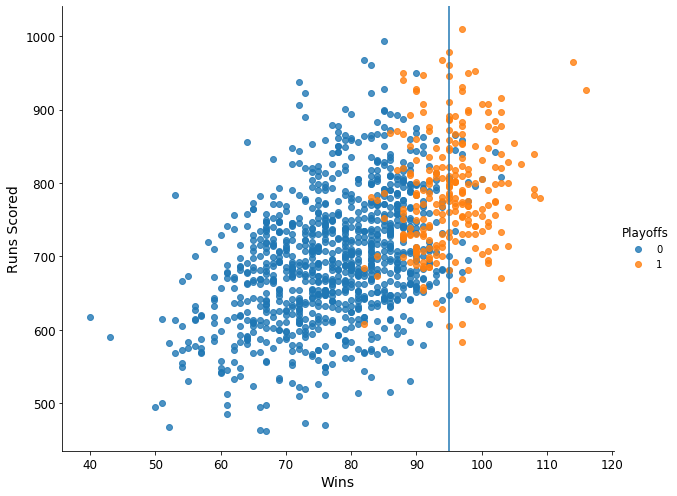

In [23]:
# verify 95 wins claim

# Plotting scatterplot with respect to playoff
sns.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=df,height=7, aspect=1.25)
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 95)

# WE KNOW NOW WINS ABOVE 95 IS NECESSARY FOR PLAYOFFS